In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from data_augmentation import AugmentData

ModuleNotFoundError: No module named 'data_augmentation'

In [3]:
from sklearn.model_selection import train_test_split

# load data
train = np.load('data/train.npz')
X, y = train['arr_0'], train['arr_1']
classes = ['ant', 'spider', 'flower', 'dolphin', 'lobster', 'bulldozer']

X_train, X_test, y_train, y_test = train_test_split(
    train['arr_0'], train['arr_1'], test_size=0.33, random_state=42)

# Histogram of Oriented Gradients (HOG)

In [20]:
hog?

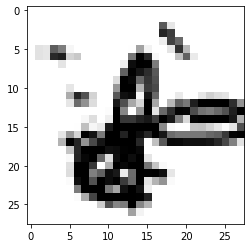

In [16]:
image = 23

plt.imshow(X[image].reshape(28, 28), cmap='gray_r')
plt.show()

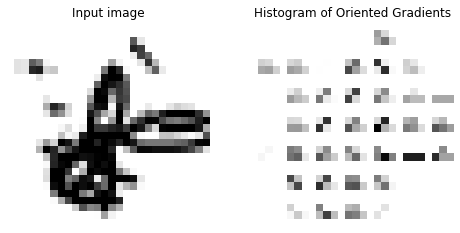

In [21]:
from skimage.feature import hog
from skimage import data, exposure


image = X[23].reshape(28, 28)

fd, hog_image = hog(image, visualize=True, pixels_per_cell=(4, 4))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap='gray_r')
ax1.set_title('Input image')

# Rescale histogram for better display
# hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image, cmap='gray_r')
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

# Parameter Tuning on Original Dataset

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

pipe = Pipeline([('transformer', FunctionTransformer(lambda x: x / 255)),
                 ('polynomials', PolynomialFeatures(include_bias=False)),
                 ('pca', PCA()),
                 ('logistic', LogisticRegression())])

parameters = {'polynomials__degree': [2],
              'pca__n_components': [600, 650, 700],
              'logistic__penalty': ['l2'],
              'logistic__C': [0.001, 0.005, 0.01]}

clf = RandomizedSearchCV(pipe, parameters, n_iter=100, n_jobs=60, verbose=2)

clf.fit(X_train, y_train)

In [28]:
print(f'accuracy: {clf.best_score_:.3f}',
      f'\nbest parameters: { clf.best_params_}')

accuracy: 0.531 
best parameters: {'polynomials__degree': 2, 'pca__n_components': 650, 'logistic__penalty': 'l2', 'logistic__C': 0.005}


# Fit on Augmented Dataset
Rotations and flips do not seem to increase accuracy (they actually decrease it).

In [ ]:
aug_data = AugmentData(X_train, y_train, classes)
aug_data.add_shifted_images([1, 2])
X_train_aug, y_train_aug = aug_data.return_data()

fitted_pipe = Pipeline([('transformer', FunctionTransformer(lambda x: x / 255)),
                        ('polynomials', PolynomialFeatures(degree=2, include_bias=False)),
                        ('pca', PCA(n_components=650)),
                        ('logistic', LogisticRegression(C=0.005, n_jobs=100))])

fitted_pipe.fit(X_train_aug, y_train_aug)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = fitted_pipe.predict(X_test)
accuracy_score(y_test, y_pred)

In [34]:
from sklearn.metrics import accuracy_score
y_pred = fitted_pipe.predict(X_test)
accuracy_score(y_test, y_pred)

0.501010101010101

In [31]:
from sklearn.metrics import accuracy_score
y_pred = fitted_pipe.predict(X_test)
accuracy_score(y_test, y_pred)

0.43636363636363634

In [20]:
from sklearn.metrics import accuracy_score
y_pred = fitted_pipe.predict(X_test)
accuracy_score(y_test, y_pred)

0.43636363636363634

In [8]:
from sklearn.metrics import accuracy_score
y_pred = fitted_pipe.predict(X_test)
accuracy_score(y_test, y_pred)

0.5414141414141415

In [32]:
def show_confusion_matrix(y_test, y_pred, classes):
    df_report = pd.DataFrame(confusion_matrix(y_test, y_pred, normalize='true'), columns=classes).round(3)
    df_report.index = classes
    display(df_report)

show_confusion_matrix(y_test, y_pred, classes)

,ant,spider,flower,dolphin,lobster,bulldozer
ant,0.355,0.224,0.079,0.053,0.211,0.079
spider,0.208,0.396,0.062,0.073,0.177,0.083
flower,0.097,0.028,0.750,0.000,0.083,0.042
dolphin,0.045,0.170,0.023,0.523,0.102,0.136
lobster,0.188,0.138,0.138,0.150,0.262,0.125
bulldozer,0.145,0.133,0.024,0.181,0.157,0.361


# Final Estimation

In [8]:
# load data
train = np.load('data/train.npz')
X, y = train['arr_0'], train['arr_1']
classes = ['ant', 'spider', 'flower', 'dolphin', 'lobster', 'bulldozer']

aug_data = AugmentData(X, y_train, classes)
aug_data.add_shifted_images([1, 2, 3])
X_aug, y_aug = aug_data.return_data()

fitted_pipe.fit(X_train_aug, y_train_aug)

RandomForestClassifier(bootstrap=False, max_depth=91, max_features='sqrt',
                       min_samples_leaf=3, n_estimators=1672, n_jobs=100)

# Submission
no submission was made to kaggle

In [46]:
# load data
test = np.load('data/test.npz')
X_test = test['arr_0']
y_pred_test = fitted_rf.predict(X_test)
submission = pd.DataFrame({'Id': range(len(y_pred_test)), 'Category': y_pred_test})
submission.head()

,Id,Category
0,0,2
1,1,2
2,2,1
3,3,5
4,4,2


In [47]:
submission.to_csv('submissions/logistic.csv', index=False)